In [437]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
#load the dataset
df = pd.read_csv(r"C:\Users\maria\Documents\Dissertation\cirrhosis+patient+survival+prediction+dataset-1\cirrhosis.csv")

In [441]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [443]:
df = df.copy()

In [445]:
df.select_dtypes(['object'])  # Select columns of type 'object'

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N
414,C,NaN,F,NaN,NaN,NaN,N
415,C,NaN,F,NaN,NaN,NaN,N
416,C,NaN,F,NaN,NaN,NaN,N


In [447]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [449]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Status
C     232
D     161
CL     25
Name: count, dtype: int64


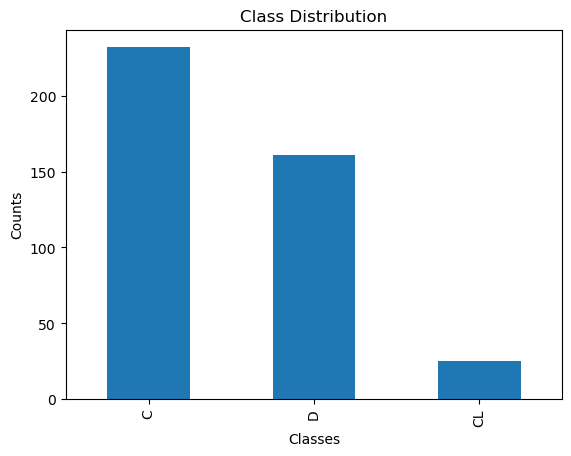

In [451]:
# Assuming your target variable is 'Status'
class_counts = df['Status'].value_counts()
print(class_counts)

# Visualization
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [453]:
df.shape

(418, 20)

In [455]:
from sklearn.impute import KNNImputer

In [457]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder



# List of categorical columns (excluding numerical ones)
categorical_cols = ['Status', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Sex']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check if there are any numerical columns
if not numerical_cols:
    print("No numerical columns found in the DataFrame.")
else:
    # Identify columns with missing values that are numerical
    numerical_cols_with_missing = df[numerical_cols].columns[df[numerical_cols].isnull().any()].tolist()

    # Print the numerical columns with missing values
    print("Numerical columns with missing values:", numerical_cols_with_missing)

    # Impute only numerical data with missing values if any exist
    if numerical_cols_with_missing:
        imputer = KNNImputer(n_neighbors=5)
        df[numerical_cols_with_missing] = imputer.fit_transform(df[numerical_cols_with_missing])
    else:
        print("No numerical columns with missing values to impute.")

# Encode only the categorical columns
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Optionally, convert encoded labels back to their original form if needed
for col in categorical_cols:
    if col in label_encoders:  # Check if encoder exists
        df[col] = label_encoders[col].inverse_transform(df[col])

# Check the dataset for missing values
print(df.isnull().sum())


Numerical columns with missing values: ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [459]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,nan,24472,F,nan,nan,nan,N,1.2,375.4,2.96,147.2,1286.0,123.38,108.8,174.0,10.9,3.0
414,415,1103,C,nan,14245,F,nan,nan,nan,N,0.9,552.6,3.83,68.2,1471.4,123.38,106.4,180.0,11.2,4.0
415,416,1055,C,nan,20819,F,nan,nan,nan,N,1.6,312.6,3.42,70.6,1062.4,92.91,131.4,143.0,9.9,3.0
416,417,691,C,nan,21185,F,nan,nan,nan,N,0.8,389.2,3.75,66.6,1412.6,90.36,174.2,269.0,10.4,3.0


In [461]:
df['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [463]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [465]:
# Standardization
numerical_cols = ['Bilirubin', 'Cholesterol', 'Age', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
scaler = StandardScaler()


In [467]:
# Ensure the numerical columns are cast to float before scaling
df[numerical_cols] = df[numerical_cols].astype(float)



#df.loc[:, numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [469]:
df.loc[:, numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [471]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], drop_first=True)

In [473]:
# Label Encoding for ordinal categorical variables
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])  # Example if Status is ordinal

In [475]:
df

,ID,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Drug_nan,Sex_M,Ascites_Y,Ascites_nan,Hepatomegaly_Y,Hepatomegaly_nan,Spiders_Y,Spiders_nan,Edema_S,Edema_Y
0,1,400,2,0.768941,2.562152,-0.490518,2.60,0.853692,-0.103955,0.422885,...,False,False,True,False,True,False,True,False,False,True
1,2,4500,0,0.546706,-0.481759,-0.281839,4.14,-0.483026,2.897693,-0.056370,...,False,False,False,False,True,False,True,False,False,False
2,3,1012,2,1.852567,-0.413611,-0.923145,3.48,1.561366,-0.739520,-0.398107,...,False,True,False,False,False,False,False,False,True,False
3,4,1925,2,0.383244,-0.322748,-0.577043,2.54,-0.351975,2.224585,-1.093938,...,False,False,False,False,True,False,True,False,True,False
4,5,1504,1,-1.210972,0.040704,-0.398903,3.53,0.683326,-0.657563,-0.063629,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,1.558178,-0.459043,0.091747,2.96,0.738368,-0.332378,0.137058,...,True,False,False,True,False,True,False,True,False,False
414,415,1103,0,-1.125174,-0.527190,0.993646,3.83,-0.296933,-0.234346,0.137058,...,True,False,False,True,False,True,False,True,False,False
415,416,1055,0,0.599707,-0.368180,-0.227888,3.42,-0.265481,-0.450608,-0.460686,...,True,False,False,True,False,True,False,True,False,False
416,417,691,0,0.695737,-0.549906,0.161985,3.75,-0.317902,-0.265437,-0.510711,...,True,False,False,True,False,True,False,True,False,False


In [477]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage_-1.164877761269741', 'Stage_-0.7081058061001805',
       'Stage_-0.47971982851539996', 'Stage_-0.25133385093062',
       'Stage_-0.022947873345839514', 'Stage_1.1189820145780618',
       'Drug_Placebo', 'Drug_nan', 'Sex_M', 'Ascites_Y', 'Ascites_nan',
       'Hepatomegaly_Y', 'Hepatomegaly_nan', 'Spiders_Y', 'Spiders_nan',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [479]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [481]:
!pip install pandas scikit-learn lightgbm xgboost imbalanced-learn


In [483]:
!pip install keras tensorflow


In [749]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
# Split data into features (X) and target (y)
X = df.drop('Status', axis=1)  # Features
y = df['Status']  # Target variable

In [751]:
# Split the data into training and testing sets, maintaining class distribution
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [834]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [836]:
# Separate classes
class_0 = df[df['Status'] == 0]
class_1 = df[df['Status'] == 1]
class_2 = df[df['Status'] == 2]


In [838]:
# Select 10 samples from class 1 for testing
class_1_test = class_1.sample(n=10, random_state=42)

In [840]:
# Remaining samples from class 1 for training
class_1_train = class_1.drop(class_1_test.index)

In [842]:
# Combine class 0 and class 2 for the training set
remaining_classes = pd.concat([class_0, class_2])


In [844]:
# Split remaining classes into train and test
remaining_train, remaining_test = train_test_split(
    remaining_classes,
    test_size=0.2,  # Adjust based on your needs
    random_state=42,
    stratify=remaining_classes['Status']  # Ensure we maintain the distribution
)

In [846]:
# Combine the train and test sets
X_train = pd.concat([remaining_train, class_1_train])
y_train = X_train['Status']

X_test = pd.concat([remaining_test, class_1_test])
y_test = X_test['Status']

In [848]:
# Drop the target variable from the feature set
X_train = X_train.drop('Status', axis=1)
X_test = X_test.drop('Status', axis=1)

In [850]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Automatically balance all classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [852]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [854]:
# Define base models with new models
model1 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model2 = AdaBoostClassifier(random_state=42)
model3 = ExtraTreesClassifier(random_state=42)
model4 = GradientBoostingClassifier(random_state=42)


In [856]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', model1),
    ('ada', model2),
    ('et', model3),
    ('gb', model4)
], voting='soft')

In [862]:
# Define the hyperparameter grid for tuning
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'ada__n_estimators': [50, 100],
    'et__n_estimators': [100, 200],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}


In [864]:
# Set up GridSearchCV
grid_search = GridSearchCV(voting_clf, param_grid, scoring='f1_weighted', cv=3, verbose=1)


In [866]:
# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:51:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:51:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorit

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric='mlogloss',
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   intera...
                                                     AdaBoostClassifier(random_state=42)),
                                                    ('et',
                                                     ExtraTreesClassifier(random_state=42)),
                                                    ('gb',
                                                     GradientBoostingClassifier(random_state=42))],
                                        voting='soft'),
             param_grid={'ada__n_estimators': [50, 100],
                         'et__n_estimators': [100, 200],
                         'gb__learning_rate': [0.01, 0.1, 0.2],
                         'gb__n_estimators': [100, 200],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

In [868]:
# Best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'ada__n_estimators': 100, 'et__n_estimators': 200, 'gb__learning_rate': 0.2, 'gb__n_estimators': 200, 'xgb__max_depth': 5, 'xgb__n_estimators': 200}


In [870]:
# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [872]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[45  0  2]
 [ 6  2  2]
 [ 6  0 26]]


In [679]:
############################################ Features and target variable########################
X = df.drop('Status', axis=1)  # Features
y = df['Status']                # Target variable

In [85]:
# Split the original data into training and testing sets (80% train, 20% test)
X_train_original, X_test, y_train_original, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [87]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Initialize SMOTE and apply it to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_original, y_train_original)


In [89]:
# Combine the resampled features and target into a new DataFrame (optional)
df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X.columns), 
                          pd.DataFrame(y_train_resampled, columns=['Status'])], axis=1)

In [91]:
# Check the new class distribution in the resampled training set
print(df_resampled['Status'].value_counts())                                                                                       
# Print sizes of the datasets
print(f"Original Training set size: {X_train_original.shape}, Original Test set size: {X_test.shape}")
print(f"Resampled Training set size: {X_train_resampled.shape}")

Status
0    185
2    185
1    185
Name: count, dtype: int64
Original Training set size: (334, 29), Original Test set size: (84, 29)
Resampled Training set size: (555, 29)


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [95]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [97]:
# Initialize and fit GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1, verbose=0)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [99]:
# Best model
best_dt = grid_search_dt.best_estimator_


In [101]:
# Predict on original test data
y_pred_dt = best_dt.predict(X_test)


In [103]:
# Evaluation
print("\nDecision Tree Evaluation on Original Data:")
print(f"Best parameters: {grid_search_dt.best_params_}")
print("Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")


Decision Tree Evaluation on Original Data:
Best parameters: {'max_depth': 10, 'min_samples_split': 10}
Confusion Matrix:
[[38  2  7]
 [ 3  1  1]
 [ 7  7 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        47
           1       0.10      0.20      0.13         5
           2       0.69      0.56      0.62        32

    accuracy                           0.68        84
   macro avg       0.53      0.52      0.52        84
weighted avg       0.71      0.68      0.69        84

Accuracy: 0.6786



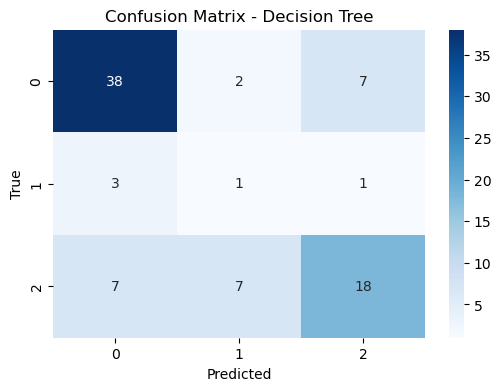

In [105]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [107]:
from sklearn.svm import SVC

In [109]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

In [113]:
# Initialize and fit GridSearchCV
grid_search_svm = GridSearchCV(SVC(random_state=42, probability=True), param_grid_svm, cv=5, n_jobs=-1, verbose=0)
grid_search_svm.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [115]:
# Best model
best_svm = grid_search_svm.best_estimator_

In [117]:

# Predict on original test data
y_pred_svm = best_svm.predict(X_test)

In [119]:
# Evaluation
print("\nSVM Evaluation on Original Data:")
print(f"Best parameters: {grid_search_svm.best_params_}")
print("Confusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}\n")



SVM Evaluation on Original Data:
Best parameters: {'C': 1, 'kernel': 'linear'}
Confusion Matrix:
[[42  1  4]
 [ 3  1  1]
 [ 5  3 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        47
           1       0.20      0.20      0.20         5
           2       0.83      0.75      0.79        32

    accuracy                           0.80        84
   macro avg       0.62      0.61      0.62        84
weighted avg       0.80      0.80      0.80        84

Accuracy: 0.7976



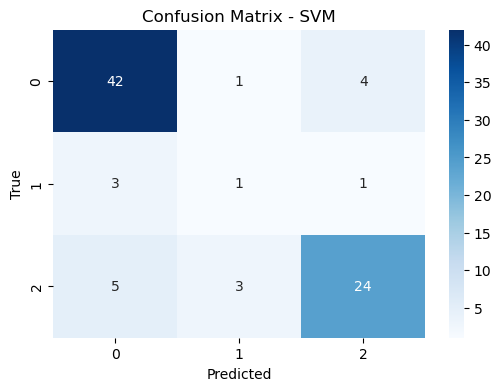

In [121]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

In [127]:
# Initialize and fit GridSearchCV
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, n_jobs=-1, verbose=0)
grid_search_gb.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [129]:
# Best model
best_gb = grid_search_gb.best_estimator_

In [131]:
# Predict on original test data
y_pred_gb = best_gb.predict(X_test)

In [133]:
# Evaluation
print("\nGradient Boosting Evaluation on Original Data:")
print(f"Best parameters: {grid_search_gb.best_params_}")
print("Confusion Matrix:")
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}\n")



Gradient Boosting Evaluation on Original Data:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Confusion Matrix:
[[43  1  3]
 [ 3  1  1]
 [ 5  3 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.20      0.20      0.20         5
           2       0.86      0.75      0.80        32

    accuracy                           0.81        84
   macro avg       0.63      0.62      0.63        84
weighted avg       0.81      0.81      0.81        84

Accuracy: 0.8095



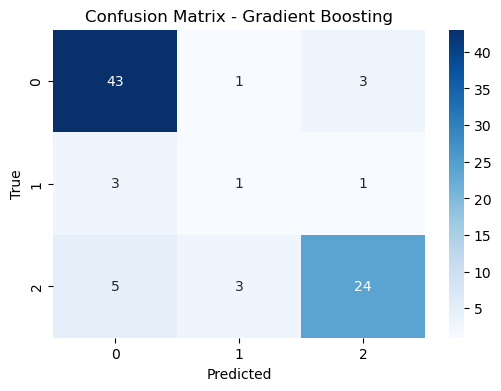

In [135]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [137]:
from catboost import CatBoostClassifier

In [139]:
# Define parameter grid for CatBoost
param_grid_cat = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 10]
}

In [141]:
# Initialize and fit GridSearchCV
grid_search_cat = GridSearchCV(CatBoostClassifier(silent=True, random_state=42), param_grid_cat, cv=5, n_jobs=-1, verbose=0)
grid_search_cat.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F99176E0C0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]})

In [143]:
# Best model
best_cat = grid_search_cat.best_estimator_


In [145]:
# Predict on original test data
y_pred_cat = best_cat.predict(X_test)

In [147]:
# Evaluation
print("\nCatBoost Evaluation on Original Data:")
print(f"Best parameters: {grid_search_cat.best_params_}")
print("Confusion Matrix:")
cm_cat = confusion_matrix(y_test, y_pred_cat)
print(cm_cat)
print("Classification Report:")
print(classification_report(y_test, y_pred_cat, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}\n")


CatBoost Evaluation on Original Data:
Best parameters: {'depth': 5, 'learning_rate': 0.2, 'n_estimators': 200}
Confusion Matrix:
[[42  1  4]
 [ 3  0  2]
 [ 4  5 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.00      0.00      0.00         5
           2       0.79      0.72      0.75        32

    accuracy                           0.77        84
   macro avg       0.55      0.54      0.54        84
weighted avg       0.78      0.77      0.78        84

Accuracy: 0.7738



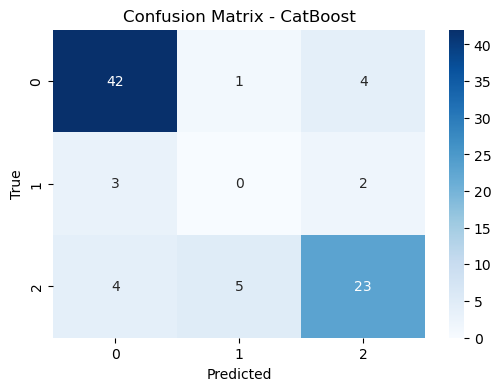

In [149]:

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [151]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [153]:
# Define parameter grid for Balanced Random Forest
param_grid_brf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

In [155]:

# Initialize and fit GridSearchCV
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=42), param_grid_brf, cv=5, n_jobs=-1, verbose=0)
grid_search_brf.fit(X_train_resampled, y_train_resampled)

C:\Users\maria\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maria\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\maria\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


GridSearchCV(cv=5, estimator=BalancedRandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100]})

In [157]:
# Best model
best_brf = grid_search_brf.best_estimator_


In [159]:
# Predict on original test data
y_pred_brf = best_brf.predict(X_test)

In [161]:

# Evaluation
print("\nBalanced Random Forest Evaluation on Original Data:")
print(f"Best parameters: {grid_search_brf.best_params_}")
print("Confusion Matrix:")
cm_brf = confusion_matrix(y_test, y_pred_brf)
print(cm_brf)
print("Classification Report:")
print(classification_report(y_test, y_pred_brf, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_brf):.4f}\n")


Balanced Random Forest Evaluation on Original Data:
Best parameters: {'max_depth': None, 'n_estimators': 100}
Confusion Matrix:
[[43  2  2]
 [ 3  0  2]
 [ 5  4 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.00      0.00      0.00         5
           2       0.85      0.72      0.78        32

    accuracy                           0.79        84
   macro avg       0.56      0.54      0.55        84
weighted avg       0.80      0.79      0.79        84

Accuracy: 0.7857



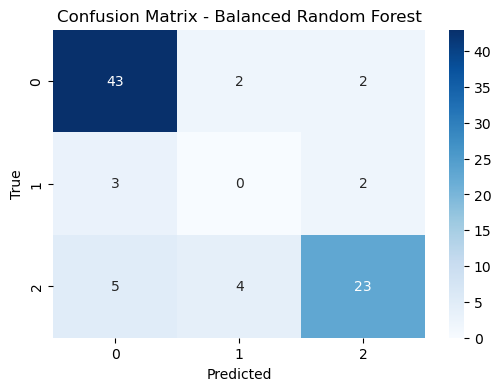

In [163]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Balanced Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [165]:
from xgboost import XGBClassifier

In [167]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}


In [169]:
# Initialize and fit GridSearchCV
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=5, n_jobs=-1, verbose=0)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [171]:
# Best model
best_xgb = grid_search_xgb.best_estimator_


In [173]:
# Predict on original test data
y_pred_xgb = best_xgb.predict(X_test)

In [175]:
# Evaluation
print("\nXGBoost Evaluation on Original Data:")
print(f"Best parameters: {grid_search_xgb.best_params_}")
print("Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n")


XGBoost Evaluation on Original Data:
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix:
[[44  2  1]
 [ 3  0  2]
 [ 5  4 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        47
           1       0.00      0.00      0.00         5
           2       0.88      0.72      0.79        32

    accuracy                           0.80        84
   macro avg       0.58      0.55      0.56        84
weighted avg       0.81      0.80      0.80        84

Accuracy: 0.7976



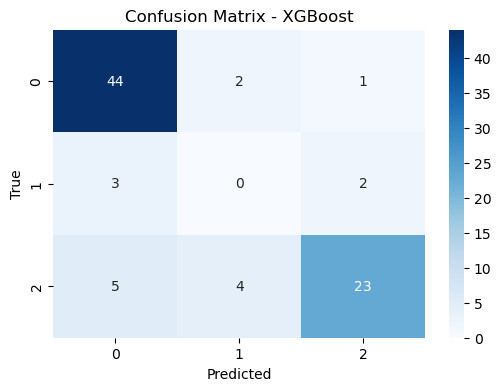

In [177]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [179]:
from lightgbm import LGBMClassifier

In [181]:
# Define parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10]
}

In [183]:
# Initialize and fit GridSearchCV
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgb, cv=5, n_jobs=-1, verbose=0)
grid_search_lgb.fit(X_train_resampled, y_train_resampled)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 555, number of used features: 26
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [185]:
# Best model
best_lgb = grid_search_lgb.best_estimator_


In [187]:
# Predict on original test data
y_pred_lgb = best_lgb.predict(X_test)

In [189]:
# Evaluation
print("\nLightGBM Evaluation on Original Data:")
print(f"Best parameters: {grid_search_lgb.best_params_}")
print("Confusion Matrix:")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print(cm_lgb)
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}\n")


LightGBM Evaluation on Original Data:
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Confusion Matrix:
[[46  0  1]
 [ 3  0  2]
 [ 6  2 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        47
           1       0.00      0.00      0.00         5
           2       0.89      0.75      0.81        32

    accuracy                           0.83        84
   macro avg       0.58      0.58      0.57        84
weighted avg       0.81      0.83      0.81        84

Accuracy: 0.8333



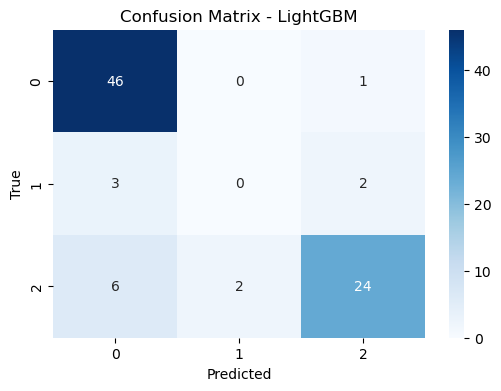

In [191]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [197]:
# Initialize and fit GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, verbose=0)
grid_search_rf.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [199]:
# Best model
best_rf = grid_search_rf.best_estimator_

In [201]:
# Predict on original test data
y_pred_rf = best_rf.predict(X_test)

In [203]:

# Evaluation
print("\nRandom Forest Evaluation on Original Data:")
print(f"Best parameters: {grid_search_rf.best_params_}")
print("Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")



Random Forest Evaluation on Original Data:
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Confusion Matrix:
[[43  2  2]
 [ 3  0  2]
 [ 8  4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.00      0.00      0.00         5
           2       0.83      0.62      0.71        32

    accuracy                           0.75        84
   macro avg       0.54      0.51      0.52        84
weighted avg       0.76      0.75      0.75        84

Accuracy: 0.7500



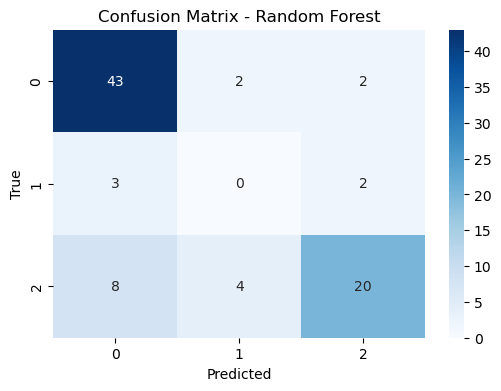

In [205]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [209]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Store metrics for comparison
metrics = {
    'Classifier': ['Decision Tree', 'SVM', 'Gradient Boosting', 'CatBoost', 
                   'Balanced Random Forest', 'XGBoost', 'LightGBM', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_cat),
        accuracy_score(y_test, y_pred_brf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_gb, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_cat, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_brf, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_lgb, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_gb, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_cat, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_brf, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_lgb, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_dt, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_svm, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_gb, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_cat, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_brf, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_lgb, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    ]
}


In [211]:

# Create a DataFrame for better visualization
import pandas as pd

metrics_df = pd.DataFrame(metrics)



In [213]:
# Display metrics
print(metrics_df)




               Classifier  Accuracy  Precision    Recall  F1 Score
0           Decision Tree  0.678571   0.712645  0.678571  0.692009
1                     SVM  0.797619   0.797176  0.797619  0.796207
2       Gradient Boosting  0.809524   0.810191  0.809524  0.807677
3                CatBoost  0.773810   0.781726  0.773810  0.776859
4  Balanced Random Forest  0.785714   0.796270  0.785714  0.788024
5                 XGBoost  0.797619   0.810440  0.797619  0.799489
6                LightGBM  0.833333   0.806590  0.833333  0.814596
7           Random Forest  0.750000   0.763007  0.750000  0.748535


In [215]:
# Optional: Visualizing the performance comparison using bar charts
import matplotlib.pyplot as plt

# Set the index to the Classifier names
metrics_df.set_index('Classifier', inplace=True)



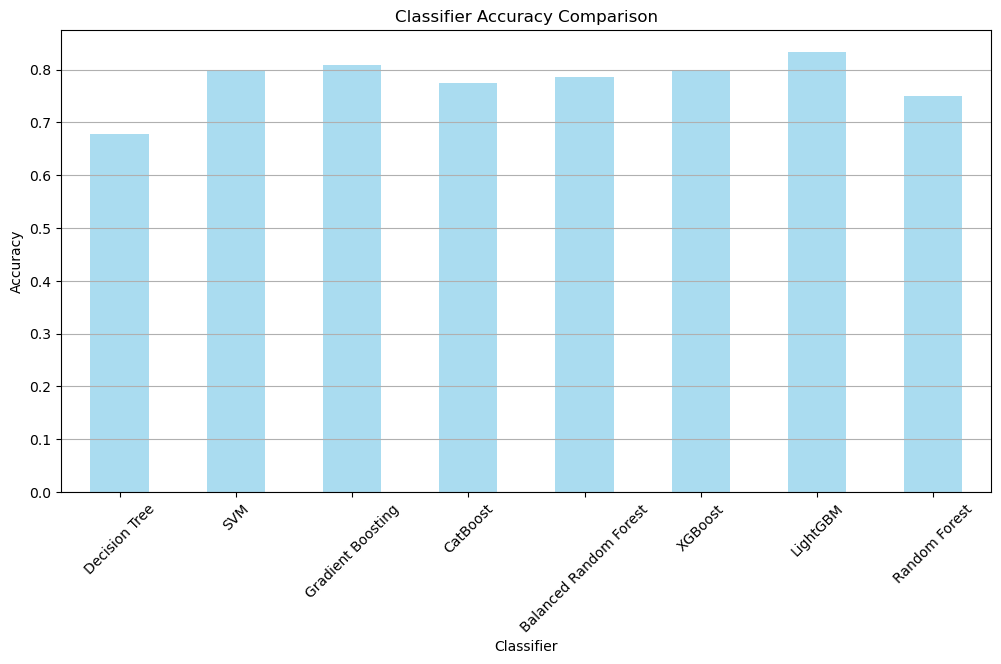

In [217]:
# Plotting Accuracy
plt.figure(figsize=(12, 6))
metrics_df['Accuracy'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



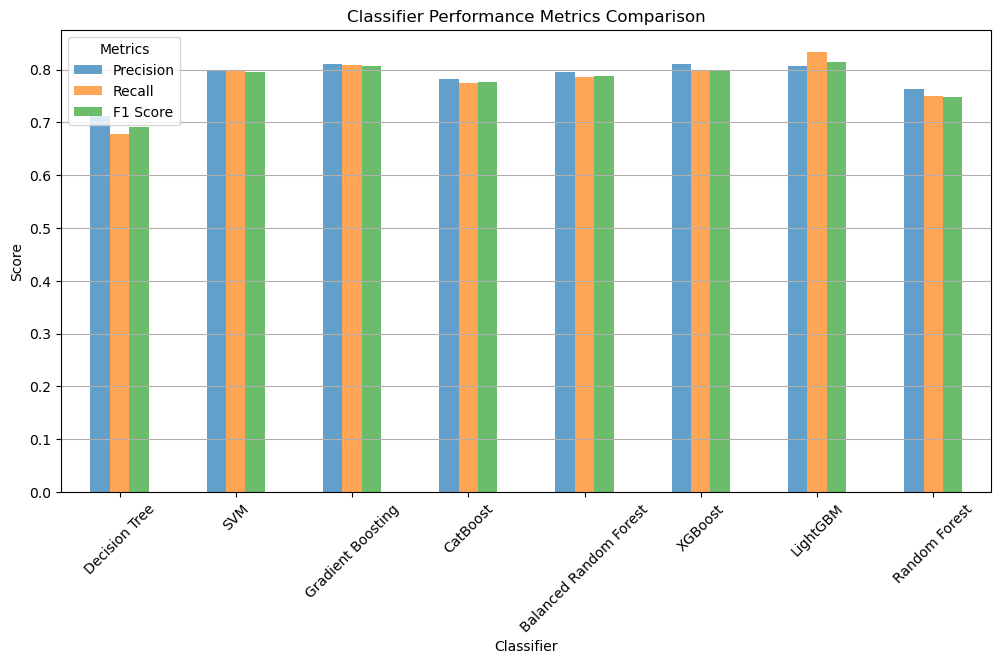

In [219]:
# Plotting other metrics
metrics_df[['Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6), alpha=0.7)
plt.title('Classifier Performance Metrics Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metrics')
plt.show()

In [221]:
# Required Libraries
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [223]:
# Gradient Boosting as the meta-classifier
meta_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)


In [225]:
# Create the stacking classifier with the trained models
stacking_clf = StackingClassifier(
    estimators=[
        ('decision_tree', best_dt),
        ('svm', best_svm),
        ('gradient_boosting', best_gb),
        ('catboost', best_cat),
        ('balanced_random_forest', best_brf),
        ('xgboost', best_xgb),
        ('lightgbm', best_lgb),
        ('random_forest', best_rf)
    ],
    final_estimator=meta_clf,
    cv=3,
    n_jobs=-1
)

In [227]:
# Fit the stacking classifier on the resampled training data
stacking_clf.fit(X_train_resampled, y_train_resampled)

StackingClassifier(cv=3,
                   estimators=[('decision_tree',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_split=10,
                                                       random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42)),
                               ('catboost',
                                <catboost.core.CatBoostClassifier object at 0x000001...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('lightgbm',
                                LGBMClassifier(max_depth=10, n_estimators=200,
                                               random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42))],
                   final_estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1)

In [229]:
# Predict on the original data
y_pred_stacking = stacking_clf.predict(X)

In [231]:
# Evaluation of stacking classifier
print("\nStacking Classifier with Gradient Boosting Meta-Classifier:")
print("Confusion Matrix:")
cm_stacking = confusion_matrix(y, y_pred_stacking)
print(cm_stacking)
print("Classification Report:")
print(classification_report(y, y_pred_stacking, zero_division=0))
print(f"Accuracy: {accuracy_score(y, y_pred_stacking):.4f}\n")


Stacking Classifier with Gradient Boosting Meta-Classifier:
Confusion Matrix:
[[222   1   9]
 [  3  20   2]
 [ 10   0 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       232
           1       0.95      0.80      0.87        25
           2       0.93      0.94      0.93       161

    accuracy                           0.94       418
   macro avg       0.94      0.90      0.92       418
weighted avg       0.94      0.94      0.94       418

Accuracy: 0.9402



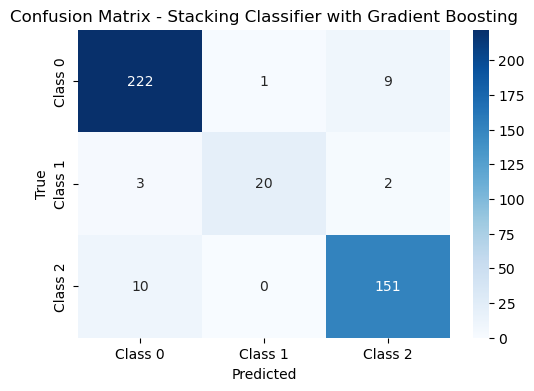

In [233]:
# Plot the confusion matrix for stacking
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix - Stacking Classifier with Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [235]:
# Create a voting classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', best_dt),
        ('svm', best_svm),
        ('gradient_boosting', best_gb),
        ('catboost', best_cat),
        ('balanced_random_forest', best_brf),
        ('xgboost', best_xgb),
        ('lightgbm', best_lgb),
        ('random_forest', best_rf)
    ],
    voting='soft',  # Use 'hard' for majority voting
    n_jobs=-1
)


In [237]:
# Fit the voting classifier on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)


VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000001F9914C1...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lightgbm',
                              LGBMClassifier(max_depth=10, n_estimators=200,
                                             random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

In [265]:
# Predict on the original data
y_pred_voting = voting_clf.predict(X)

In [267]:
# Evaluation of voting classifier
print("\nVoting Classifier (Soft Voting):")
print("Confusion Matrix:")
cm_voting = confusion_matrix(y, y_pred_voting)
print(cm_voting)
print("Classification Report:")
print(classification_report(y, y_pred_voting, zero_division=0))
print(f"Accuracy: {accuracy_score(y, y_pred_voting):.4f}\n")



Voting Classifier (Soft Voting):
Confusion Matrix:
[[230   1   1]
 [  3  20   2]
 [  6   4 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       232
           1       0.80      0.80      0.80        25
           2       0.98      0.94      0.96       161

    accuracy                           0.96       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.96      0.96      0.96       418

Accuracy: 0.9593



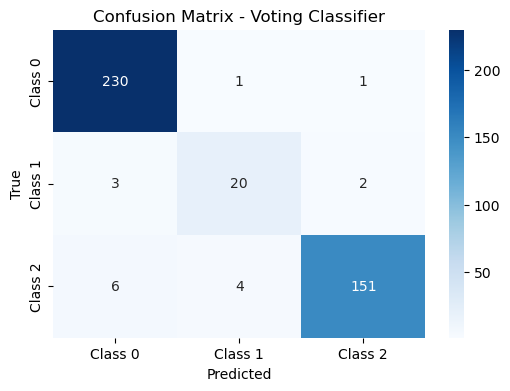

In [269]:
# Plot the confusion matrix for voting
plt.figure(figsize=(6, 4))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [271]:
# Store metrics for comparison
metrics = {
    'Classifier': ['Stacking', 'Voting'],
    'Accuracy': [
        accuracy_score(y, y_pred_stacking),
        accuracy_score(y, y_pred_voting)
    ],
    'Precision': [
        precision_score(y, y_pred_stacking, average='weighted', zero_division=0),
        precision_score(y, y_pred_voting, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y, y_pred_stacking, average='weighted', zero_division=0),
        recall_score(y, y_pred_voting, average='weighted', zero_division=0)
    ],
    'F1 Score': [
        f1_score(y, y_pred_stacking, average='weighted', zero_division=0),
        f1_score(y, y_pred_voting, average='weighted', zero_division=0)
    ]
}

In [273]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame(metrics)


In [275]:
# Display comparison
print(comparison_df)

  Classifier  Accuracy  Precision    Recall  F1 Score
0   Stacking  0.940191   0.940295  0.940191  0.939822
1     Voting  0.959330   0.959635  0.959330  0.959180


In [277]:

# Visualization of metrics for Accuracy, Precision, Recall, and F1 Score
import matplotlib.pyplot as plt



In [279]:
# Set the figure size
plt.figure(figsize=(15, 8))
bar_width = 0.15  # Width of bars
x = range(len(comparison_df['Classifier']))  # x locations for the groups



<Figure size 1500x800 with 0 Axes>

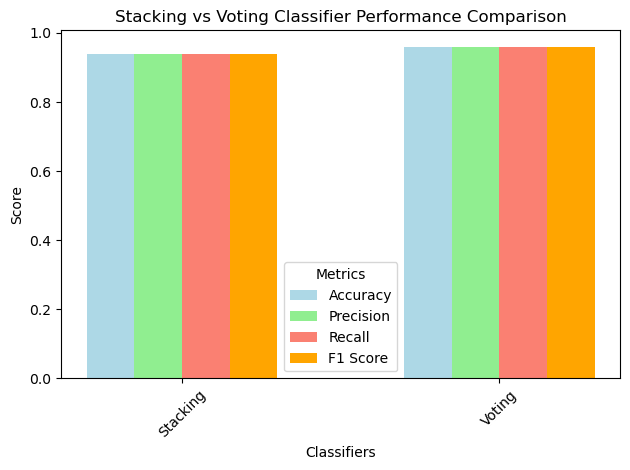

In [255]:
# Create bars for each metric with explicit labels
accuracy_bars = plt.bar([p for p in x], comparison_df['Accuracy'], width=bar_width, label='Accuracy', color='lightblue')
precision_bars = plt.bar([p + bar_width for p in x], comparison_df['Precision'], width=bar_width, label='Precision', color='lightgreen')
recall_bars = plt.bar([p + 2 * bar_width for p in x], comparison_df['Recall'], width=bar_width, label='Recall', color='salmon')
f1_score_bars = plt.bar([p + 3 * bar_width for p in x], comparison_df['F1 Score'], width=bar_width, label='F1 Score', color='orange')

# Adding labels and title
plt.title('Stacking vs Voting Classifier Performance Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.xticks([p + 1.5 * bar_width for p in x], comparison_df['Classifier'], rotation=45)

# Call legend explicitly
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()
